Лабораторная работа №2

1.Загрузить файл auto.csv 

2.Рассчитать основные статистики для переменных(среднее, медиана, мода, мин/макс, сред. отклонение)

In [1]:
import pandas as pd
import statistics
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('auto.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
hed = df.columns
hed

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [67]:
# выбираем для расчета переменные с числовым типом
variable_list = ['symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height', 
                                      'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 
                                      'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [68]:
# создаем таблицу, где в строках перечислены переменные, в столбцах будут статистики
df_info = pd.DataFrame({'Переменные' : variable_list})

In [69]:
def param_mean(df):
    list_to_series = []
    for name in variable_list:
        list_to_series.append(statistics.mean(df[name]))
    return pd.Series(list_to_series)
def param_median(df):
    list_to_series = []
    for name in variable_list:
        list_to_series.append(statistics.median(df[name]))
    return pd.Series(list_to_series)
def param_min(df):
    list_to_series = []
    for name in variable_list:
        list_to_series.append(df[name].min())
    return pd.Series(list_to_series)
def param_max(df):
    list_to_series = []
    for name in variable_list:
        list_to_series.append(df[name].max())
    return pd.Series(list_to_series)
def param_cko(df):
    list_to_series = []
    for name in variable_list:
        list_to_series.append(statistics.pstdev(df[name]))
    return pd.Series(list_to_series)
def param_mode(df):
    list_to_series = []
    for name in variable_list:
        try:
            list_to_series.append(statistics.mode(df[name]))
        except:
            list_to_series.append('NaN')
    return pd.Series(list_to_series)

In [70]:
df_info['Среднее'] = param_mean(df)
df_info['Медиана'] = param_median(df)
df_info['mode'] = param_mode(df)
df_info['Мин'] = param_min(df)
df_info['Макс'] = param_max(df)
df_info['Среднее отклонение'] = param_cko(df)
df_info
# мода для переменной engine-size не рассчитана, т.к. найдены несколько одинаково распространенных значений

,Переменные,Среднее,Медиана,mode,Мин,Макс,Среднее отклонение
0,symboling,0.834146,1.00,0,-2.00,3.00,1.242266
1,normalized-losses,126.365854,122.00,161,65.00,256.00,35.351859
2,wheel-base,98.756585,97.00,94.5,86.60,120.90,6.007070
3,length,174.049268,173.20,157.3,141.10,208.10,12.307161
4,width,65.907805,65.50,63.8,60.30,72.30,2.139965
5,height,53.724878,54.10,50.8,47.80,59.80,2.437555
6,curb-weight,2555.565854,2414.00,2385,1488.00,4066.00,519.408699
7,engine-size,126.907317,120.00,NaN,61.00,326.00,41.541002
8,bore,3.324878,3.31,3.62,2.54,3.94,0.272382
9,stroke,3.253366,3.29,3.4,2.07,4.17,0.313171


3.Рассчитать и визуализировать корреляционную матрицу для переменных

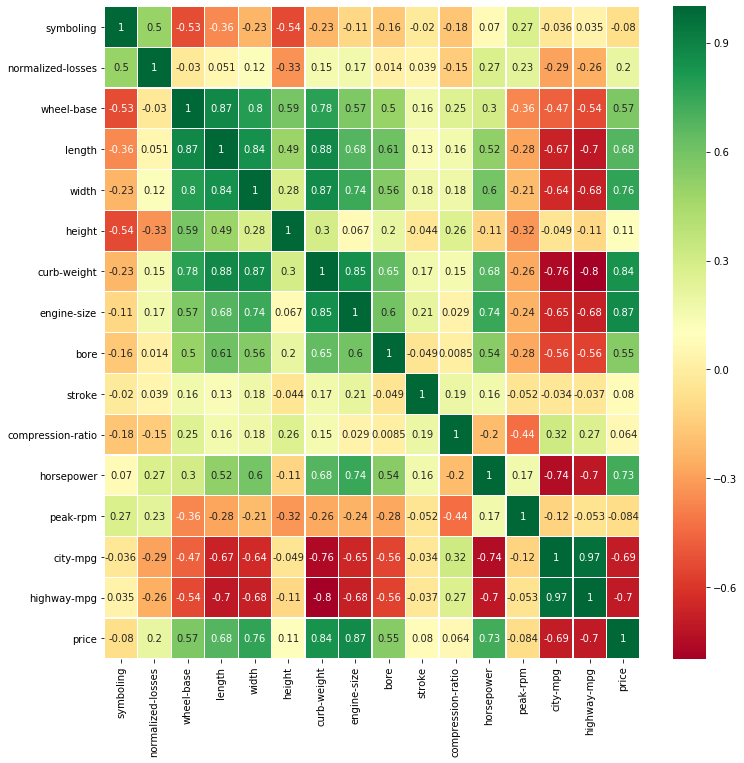

In [20]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

# видим, что между многими показателями есть сильная корреляция

4.Визуализировать распределение переменной ‘Price’, рассчитать показатели skewness и kurtosis

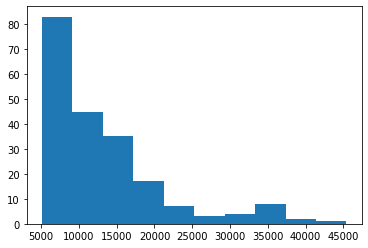

In [22]:
plt.hist(df.price)
plt.show()

In [23]:
# визуально распределение похоже на экспоненциальное, проверим эту гипотезу с помощью теста
from statsmodels.stats.diagnostic import lilliefors
ksstat, pvalue = lilliefors(df['price'], dist='exp')
print('pvalue: ', pvalue)

# p-value < 0,05 значит отвергаем гипотезу, это не экспоненциальное распределение

pvalue:  0.01


In [35]:
# рассчитаем ассиметрию
stats.skew(df['price'])

# т.к. показатель ассиметрии положителен и > 0.5 можно сказать, что распределение существенно скошено вправо 
# что также видно на графике

1.7534486514523662

In [27]:
# рассчитаем эксцесс
stats.kurtosis(df['price'])

# эксцесс > 0 говорит о том, что распределение является более высоким («островершинным») 
# относительно «эталонного» нормального распределения

2.848082544390688

5.Визуализировать несколько взаимосвязей между переменными

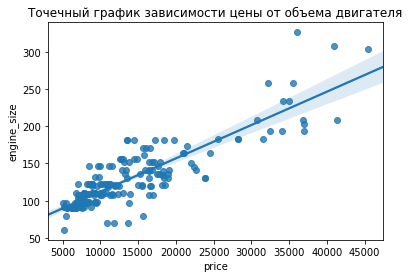

In [36]:
# визуализируем взаимосвязь цены и объема двигателя
price = df['price']
engine_size = df['engine-size']
sns.regplot(x = price, y = engine_size, data = df, fit_reg = True)
plt.xlabel('price')
plt.ylabel('engine_size')
plt.title('Точечный график зависимости цены от объема двигателя')
plt.show()

# из графика видно, что цена находится в прямой зависимости от объема двигателя, особенно в категории до 25000
# что подтверждает и коэффициент корреляции = 0,87

In [39]:
# дополнительно проверим наличие линейной связи между выбранными переменными с помощью коэффициента Пирсона
from scipy.stats import pearsonr
coeff, p_value = pearsonr(price, engine_size)
print('p-value = ', p_value)

# p-value стремится к нулю, из чего делаем вывод, что переменные линейно зависимы

p-value =  1.6843488568733035e-64


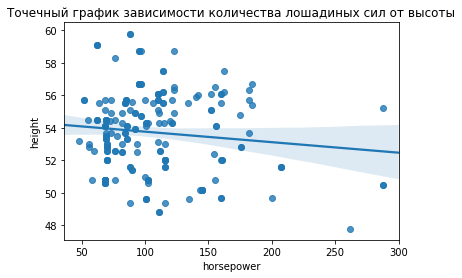

In [37]:
# визуализируем взаимосвязь высоты и количества лошадиных сил
horsepower = df['horsepower']
height = df['height']
sns.regplot(x = horsepower, y = height, data = df, fit_reg = True)
plt.xlabel('horsepower')
plt.ylabel('height')
plt.title('Точечный график зависимости количества лошадиных сил от высоты')
plt.show()

# из графика видно, что взаимосвязи между показателями практически нет, значения не сосредоточены вдоль регрессионной прямой

In [40]:
# дополнительно проверим наличие линейной связи между выбранными переменными с помощью коэффициента Пирсона
from scipy.stats import pearsonr
coeff, p_value = pearsonr(horsepower, height)
print('p-value = ', p_value)

# p-value > 0.05, поэтому нет оснований отвергать гипотезу Ho о независимости переменных

p-value =  0.10070033236355294


6.Выдвинуть несколько гипотез по набору имеющихся переменных и проверить эти гипотезы с использованием t-test.

In [42]:
# выдвигаем гипотезу Ho о том, что у машин с четырьмя и пятью цилиндрами объемы двигателей не отличаются
# применим двухвыборочный t-критерий
four_cylinders = df[df['num-of-cylinders'] == 'four']['engine-size']
five_cylinders = df[df['num-of-cylinders'] == 'five']['engine-size']
print(stats.ttest_ind(four_cylinders, five_cylinders))

# т.к. p-value стремится к нулю, то делаем вывод о том, что мы получили статистически значимый результат,
# т.е. объемы двигателей отличаются в зависимости от того, сколько имеют цилиндров

Ttest_indResult(statistic=-6.3516981823943786, pvalue=1.9206253359451273e-09)


In [55]:
# выдвигаем гипотезу Ho о том, что средняя цена на toyota не отличается от средней цены в среднем по всей совокупности
# проверим с помощью одновыборочного t-критерия
toyota = df[df['make'] == 'toyota']['price']
stats.ttest_1samp(toyota, df['price'].mean())

# т.к t-значение находится за пределами интервала ±табличное значение(2.04) и p-value близко к нулю, то отвергаем гипотезу Ho
# и полагаем, что есть различия между средней ценой на автомобили toyota и средней ценой всех автомобилей

Ttest_1sampResult(statistic=-6.048542991392779, pvalue=1.0688605817292444e-06)

In [56]:
print('Количество машин марки toyota: ', len(toyota))

Количество машин марки toyota:  32
